In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold # Validación, validación cruzada
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, precision_score, recall_score, f1_score # Metricas y coeficientes de eficiencia

%matplotlib inline
pv2 = pd.read_csv('C:/Users/SANTY/Downloads/practicas_pV2.csv')
pv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   status_generado                             9864 non-null   int64
 1   scorecc                                     9864 non-null   int64
 2   acreedores                                  9864 non-null   int64
 3   cuentas_activas                             9864 non-null   int64
 4   emprende_activos                            9864 non-null   int64
 5   emprende_cerrados                           9864 non-null   int64
 6   quebrantos                                  9864 non-null   int64
 7   atrasos                                     9864 non-null   int64
 8   cobranza                                    9864 non-null   int64
 9   creditosFraudulentos                        9864 non-null   int64
 10  creditosIntegranteCausanteDeMora    

In [3]:
X = pv2.drop(columns = ['status_generado'])
y = pv2['status_generado']

acreedores                                    0.252305
creditosAbiertos                              0.100411
posiblesCreditosCerrados                      0.092966
scorecc                                       0.087428
creditosAbiertosQuebrantosNoCerrados          0.077467
quebrantos                                    0.068970
consultas                                     0.059904
cuentas_activas                               0.051233
cerrados                                      0.038641
domicilios                                    0.033976
otrosCreditosParaAnalizar                     0.031779
edad                                          0.031249
atrasos                                       0.025242
emprende_cerrados                             0.023925
emprende_activos                              0.013440
cobranza                                      0.005420
empleos                                       0.004802
creditosOtros                                 0.000350
creditosIn

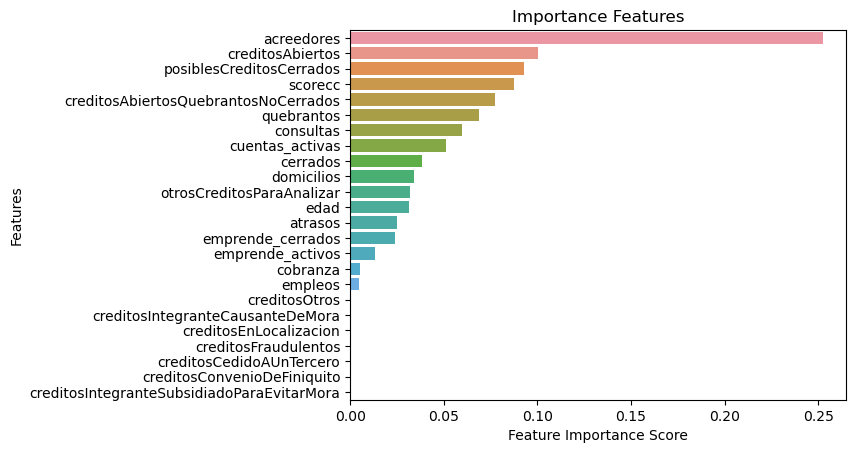

In [4]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state = 1)

clf = RandomForestClassifier(n_estimators=1000, max_depth=300,  min_samples_split=3,min_samples_leaf=3, random_state = 1)

clf.fit(X_train1,y_train1)


feature_scores = pd.Series(clf.feature_importances_, index = X_train1.columns).sort_values(ascending = False)
print(feature_scores)
sns.barplot(x = feature_scores, y = feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title('Importance Features')

plt.show()

In [5]:
name='Random Forest Exactitud'
skfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True) 
cv_results = cross_val_score(clf, X_train1, y_train1, cv=skfold, scoring='accuracy') # Validación cruzada por dobleces estraticados
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

clf.fit(X_train1,y_train1)

preds = clf.predict(X_test1)
preds1 = clf.predict(X_train1)
print(f'Exactitud del modelo {accuracy_score(y_test1, preds)}')
print(f'Precision del modelo {precision_score(y_test1, preds)}')
print(f'Sensibilidad del modelo {recall_score(y_test1, preds)}')
print(f'F1-Score del modelo {f1_score(y_test1, preds)}')


y1= list(y_test1)
y_pred1= list(preds)

for i in range(len(y1)):
    y1[i] = int(y1[i])
    y_pred1[i] = int(y_pred1[i])
    
from RegscorePy import aic, bic
print(f'AIC: {aic.aic(y1, y_pred1, p= len(X.columns))}')
print(f'BIC: {bic.bic(y1, y_pred1, p= len(X.columns))}')
print ("\n\nRandom Forest - Test Confusion Matrix\n\n",pd.crosstab(y_test1, preds,rownames = ["Actual"],colnames =["Predicted"]))
print ("\n\nRandom Forest - Train Confusion Matrix\n\n",pd.crosstab(y_train1, preds1,rownames = ["Actual"],colnames =["Predicted"]))

Random Forest Exactitud: 0.915410 (0.005621)
Exactitud del modelo 0.9158783783783784
Precision del modelo 0.9088069956277327
Sensibilidad del modelo 0.9338896020539152
F1-Score del modelo 0.9211775878442545
AIC: -7279.45528652606
BIC: -7135.624617390426


Random Forest - Test Confusion Matrix

 Predicted     0     1
Actual               
0          1256   146
1           103  1455


Random Forest - Train Confusion Matrix

 Predicted     0     1
Actual               
0          3141   124
1            56  3583


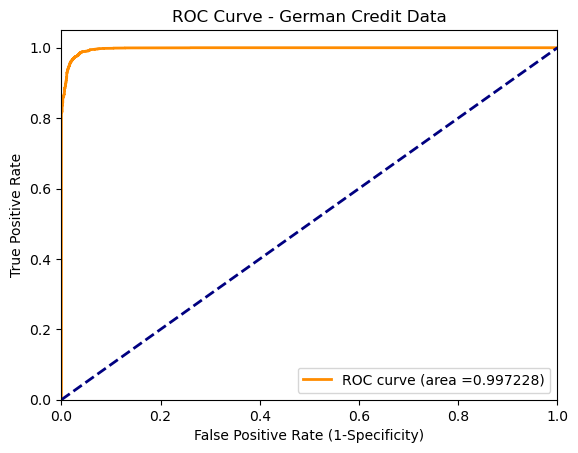

In [5]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(y_train1, clf.predict_proba(X_train1)[:,1] )

roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area =%0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - German Credit Data')
plt.legend(loc = 'lower right')

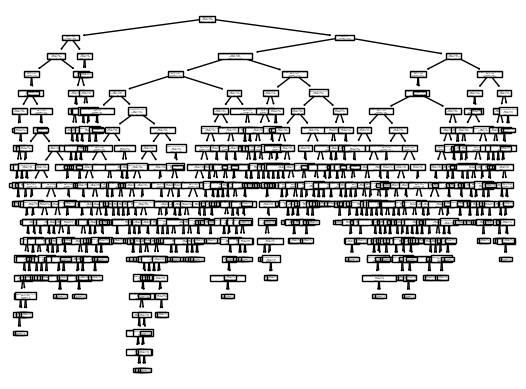

KeyboardInterrupt: 

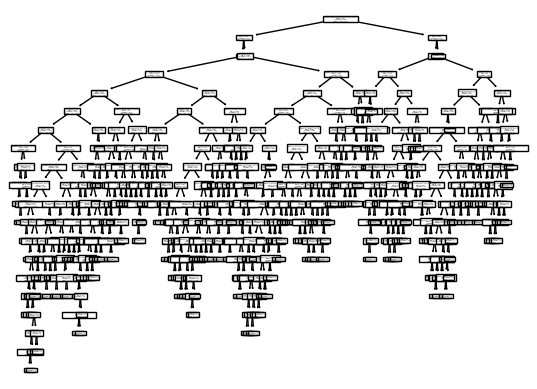

In [10]:
from sklearn import tree

for arbol in clf.estimators_:
    tree.plot_tree(arbol, feature_names=X.columns)
    plt.savefig("ClfTree.png", dpi = 1500)
    plt.show()
    